In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('/content/train (1).csv')

In [4]:
df.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome   y  
0          1      unknown  no  
1          1      unknown  no  
2          1      unknown  no  
3          1      unknown  no  
4          1      unknown  no

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [6]:
df.shape

(45211, 11)

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [8]:
df = df.drop_duplicates()

In [9]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [10]:
df.describe()
# This describes only the columns that have numeric data.

age          day           dur     num_calls
count  45205.000000  45205.00000  45205.000000  45205.000000
mean      40.937087     15.80688    258.183055      2.763898
std       10.619130      8.32234    257.538504      3.098189
min       18.000000      1.00000      0.000000      1.000000
25%       33.000000      8.00000    103.000000      1.000000
50%       39.000000     16.00000    180.000000      2.000000
75%       48.000000     21.00000    319.000000      3.000000
max       95.000000     31.00000   4918.000000     63.000000

In [11]:
# In order to check the outliers in the data, we are plotting a box plot for all the numerical data columns, find their IQR and remove the outliers.

**Checking Outliers for Age**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


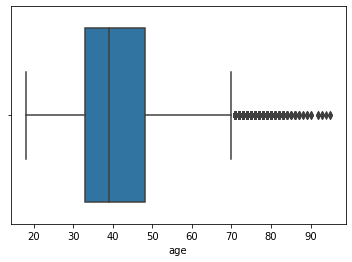

In [12]:
sns.boxplot(df['age'])

In [14]:
iqr = df.age.quantile(0.75) - df.age.quantile(0.25)
lower_threshold = df.age.quantile(0.25) - (1.5 * iqr)
upper_threshold = df.age.quantile(0.75) + (1.5 * iqr)
print('IQR:',iqr)
print('Min_value:',lower_threshold)
print('Max_value:',upper_threshold)

IQR: 15.0
Min_value: 10.5
Max_value: 70.5


In [15]:
df.age = df.age.clip(10.5, 70.5)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


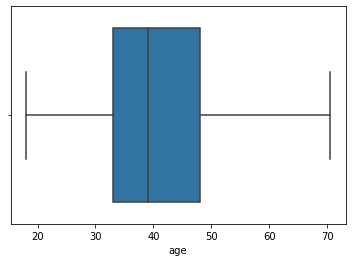

In [16]:
# Now plotting again to prove that the outliers are clipped
sns.boxplot(df['age'])

**Checking Outliers for Duration**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


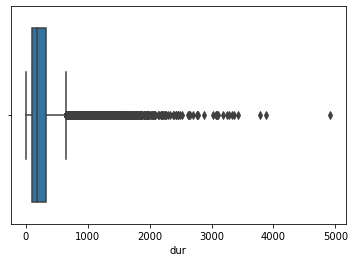

In [17]:
sns.boxplot(df['dur'])

In [18]:
iqr = df.dur.quantile(0.75) - df.dur.quantile(0.25)
lower_threshold = df.dur.quantile(0.25) - (1.5 * iqr)
upper_threshold = df.dur.quantile(0.75) + (1.5 * iqr)
print('IQR:',iqr)
print('Min_value:',lower_threshold)
print('Max_value:',upper_threshold)

IQR: 216.0
Min_value: -221.0
Max_value: 643.0


In [19]:
df.dur = df.dur.clip(-221.0, 643.0)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


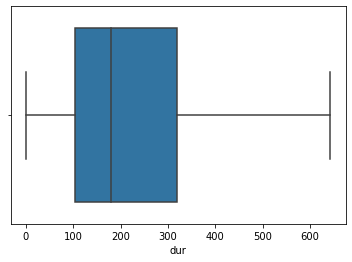

In [20]:
sns.boxplot(df['dur'])

**Checking Outliers for num_calls**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


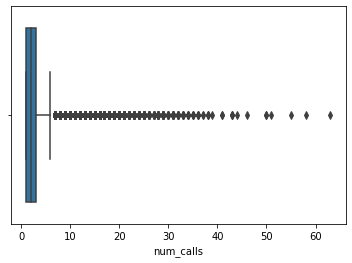

In [21]:
sns.boxplot(df['num_calls'])

In [22]:
iqr = df.num_calls.quantile(0.75) - df.num_calls.quantile(0.25)
lower_threshold = df.num_calls.quantile(0.25) - (1.5 * iqr)
upper_threshold = df.num_calls.quantile(0.75) + (1.5 * iqr)
print('IQR:',iqr)
print('Min_value:',lower_threshold)
print('Max_value:',upper_threshold)

IQR: 2.0
Min_value: -2.0
Max_value: 6.0


In [23]:
df.num_calls = df.num_calls.clip(-2.0, 6.0)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


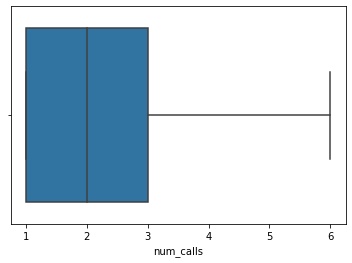

In [24]:
sns.boxplot(df['num_calls'])

In [25]:
# Now that we have cleaned outliers for numerical data columns, we are now going to clean data of categorical columns.

In [26]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [27]:
# The following are the columns of Categorical data: 'job', 'marital', 'education_qual','call_type', 'mon', 'prev_outcome', 'y'

In [28]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [29]:
df['job'].replace(['admin.'],'admin',inplace=True)

In [30]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [31]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [32]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [33]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [34]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [35]:
# After Checking that all the values of categorical columns are unique and valid, we go on to EDA - Exploratory Data Analysis.

In [36]:
# In EDA, we are finding the relation between each feature and the target Variable Y using a CountPlot.

**EDA for Numerical Column features vs Target**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


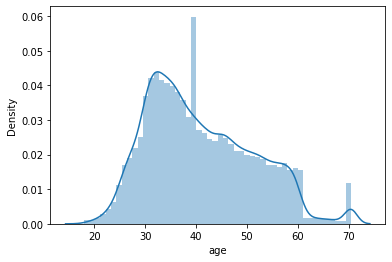

In [37]:
sns.distplot(df['age'])

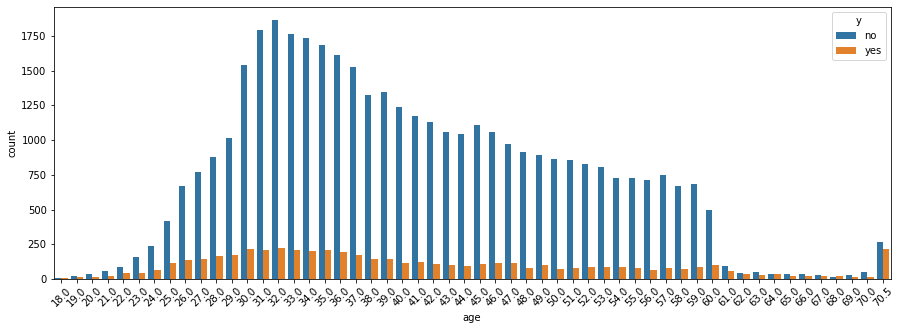

In [38]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='age', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

From the Age vs Target plot, it is evident that individuals of the age group 25 - 60 are opting for an insurance scheme. From the remaining category, those below 18 years and those aabove 60 years are not going for it.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


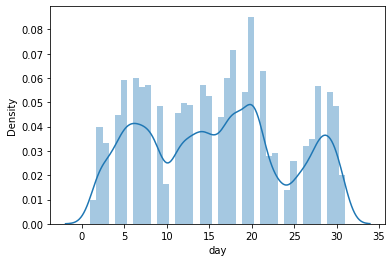

In [39]:
sns.distplot(df['day'])

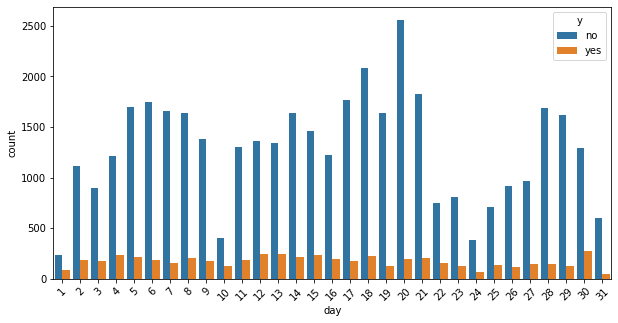

In [40]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='day', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

This plot between Day and Target Y does not show any particlar trend except the conversion is high during the middle of the month and the least during the beginning and the end of the month.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


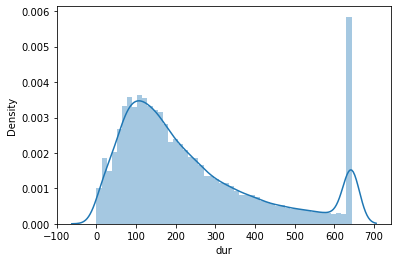

In [41]:
sns.distplot(df['dur'])

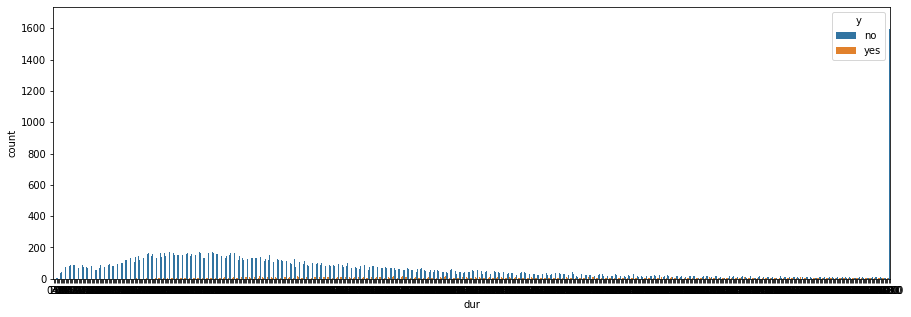

In [42]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='dur', hue='y', data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


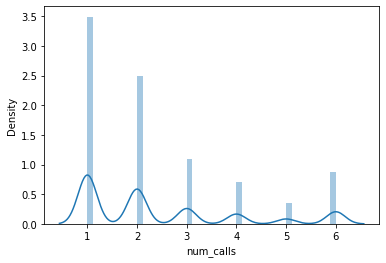

In [43]:
sns.distplot(df['num_calls'])

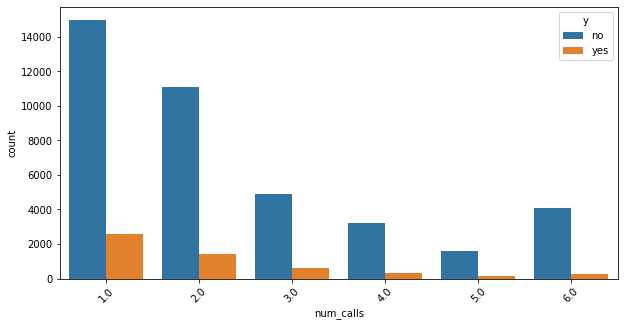

In [44]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='num_calls', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

From this plot of Num_calls vs Target Y, we notice that the conversion rate decreases with increasing number of calls or by seeing the trend, we can conclude that a maximum of 3 phone class will be a cost effective approach to target the customers.

**EDA for Categorical Column features vs Target Variable**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

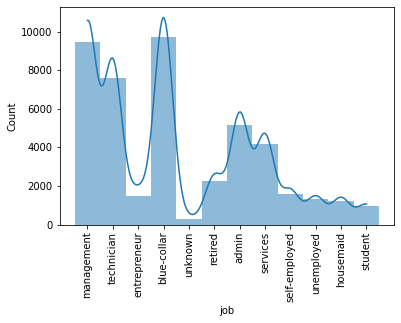

In [45]:
sns.histplot(df.job, linewidth=0,kde=True)
plt.xticks(rotation=90)

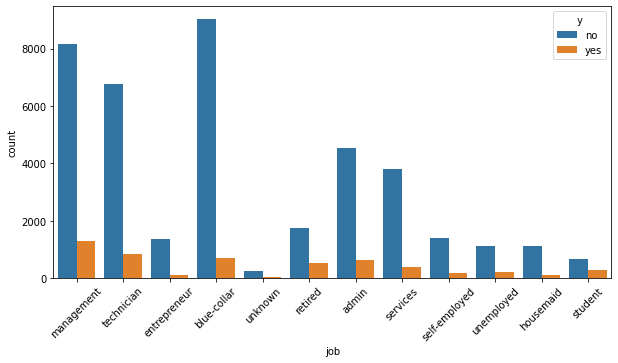

In [46]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

=> We see that the Individuals with Blue collar Jobs are the most approched, but the rate of opting is snot as much as they a re approached.

=> Next to Blue collar jobs, management is the most targetted and results with the maximum opted rate.

=> Of the total Individuals who opted for insurance, nearly 60% or more is from the 2 categories: Management and Technician(most approached next to Management)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

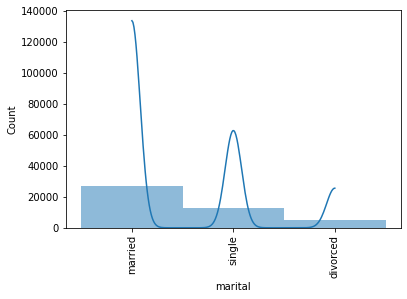

In [47]:
sns.histplot(df.marital, linewidth=0,kde=True)
plt.xticks(rotation=90)

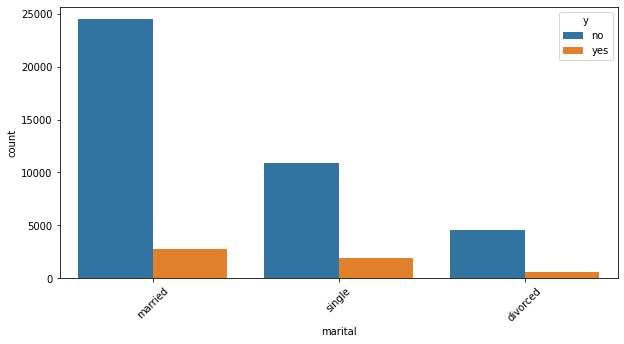

In [48]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='marital', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

It is vividly observed that Married individuals are most targetted and are mostly opting for insurance than other two categories.

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

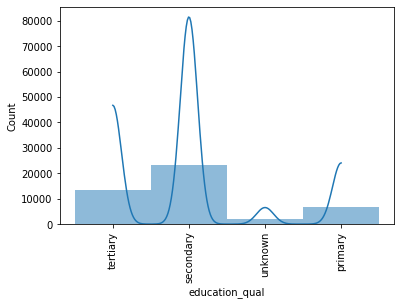

In [49]:
sns.histplot(df.education_qual, linewidth=0,kde=True)
plt.xticks(rotation=90)

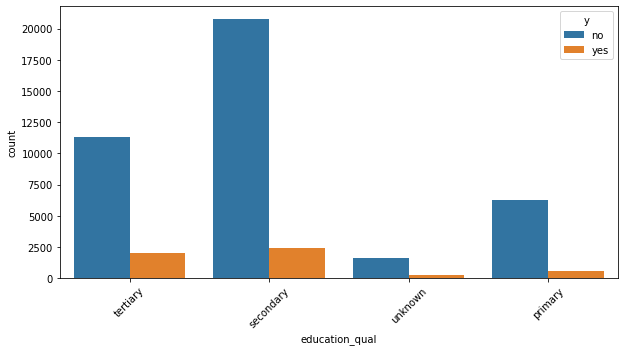

In [50]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='education_qual', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

From this plot of Education_qual vs Target Y, we see that Indiciduals with secondary education are mostly approached and those with Secondary and Tertiary levels of feducation Opt for the insuurance.

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

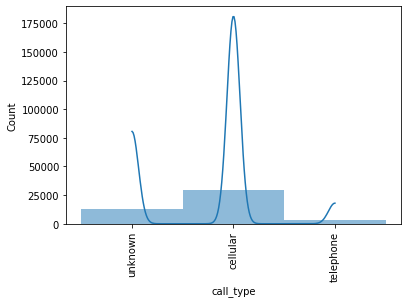

In [51]:
sns.histplot(df.call_type, linewidth=0,kde=True)
plt.xticks(rotation=90)

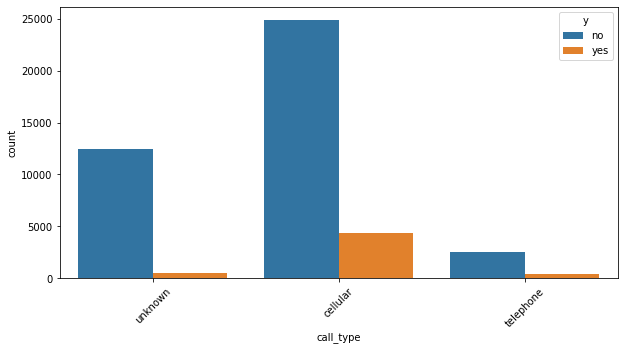

In [52]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='call_type', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

Among all the call types, we see that cellular communication results in high conversion rates.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

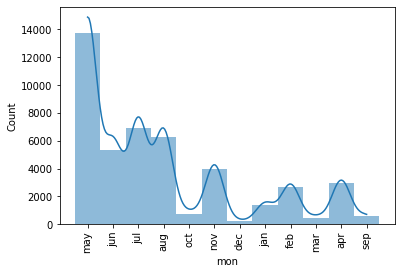

In [53]:
sns.histplot(df.mon, linewidth=0,kde=True)
plt.xticks(rotation=90)

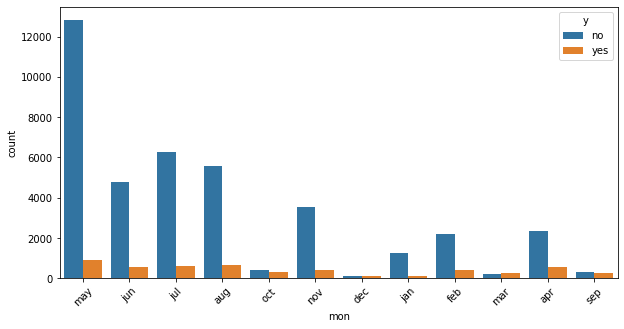

In [54]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='mon', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

From the Month vs Target Y plot, we clearly see that most people are opting for insurance after the commencement of financial year.

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

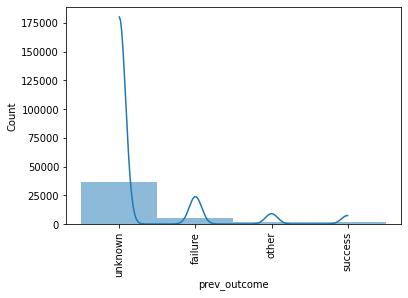

In [55]:
sns.histplot(df.prev_outcome, linewidth=0,kde=True)
plt.xticks(rotation=90)

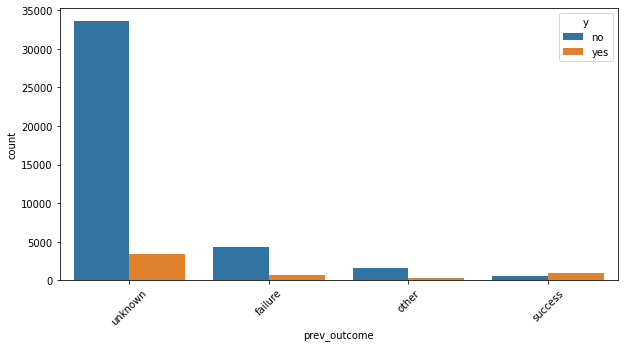

In [56]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='prev_outcome', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

From the plot between previous outcome and conversion rate, we see that when it is success previously it has high chance of conversion. A more clear plot is not seen as the column is mostly filled with unknown values.

**Checking the data types**

In [57]:
df.dtypes

age               float64
job                object
marital            object
education_qual     object
call_type          object
day                 int64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                  object
dtype: object

In [ ]:
# While checking the data types, we now see that columns of Call Duration and Number of calls have their data type as float after outlier clipping. 

**Conversion of data types**

In [58]:
df['dur'] = df['dur'].astype(int)
df['num_calls'] = df['num_calls'].astype(int)

In [59]:
df.dtypes

age               float64
job                object
marital            object
education_qual     object
call_type          object
day                 int64
mon                object
dur                 int64
num_calls           int64
prev_outcome       object
y                  object
dtype: object

Encode the data

In [60]:
# The following are the columns of Categorical data: 'job', 'marital', 'education_qual','call_type', 'mon', 'prev_outcome', 'y'
# and are to be encoded accordingly.

# Since the categorical columns contain data that is nominal in nature, we use ONE HOT ENCODING.

In [61]:
df = pd.get_dummies(df, columns = ['job','marital','education_qual','call_type','mon','prev_outcome'])

In [62]:
# The Target variable Y is to be Label encoded

In [63]:
df.y = df.y.map({'no':0, 'yes':1})

In [64]:
# Here is the dataset after encoding
df.head()

age  day  dur  num_calls  y  job_admin  job_blue-collar  job_entrepreneur  \
0  58.0    5  261          1  0          0                0                 0   
1  44.0    5  151          1  0          0                0                 0   
2  33.0    5   76          1  0          0                0                 1   
3  47.0    5   92          1  0          0                1                 0   
4  33.0    5  198          1  0          0                0                 0   

   job_housemaid  job_management  ...  mon_jun  mon_mar  mon_may  mon_nov  \
0              0               1  ...        0        0        1        0   
1              0               0  ...        0        0        1        0   
2              0               0  ...        0        0        1        0   
3              0               0  ...        0        0        1        0   
4              0               0  ...        0        0        1        0   

   mon_oct  mon_sep  prev_outcome_failure  prev_outcome_other  \
0        0        0                     0                   0   
1        0        0                     0                   0   
2        0        0                     0                   0   
3        0        0                     0                   0   
4        0        0                     0                   0   

   prev_outcome_success  prev_outcome_unknown  
0                     0                     1  
1                     0                     1  
2                     0                     1  
3                     0                     1  
4                     0                     1  

[5 rows x 43 columns]

In [65]:
df.shape

(45205, 43)

Split the data

In [66]:
X = df.drop('y', axis = 1).values
Y = df['y'].values

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=0)

In [ ]:
# Now that we have split the data, we need to check whether the data is balanced or not, so we use a COUNT PLOT.

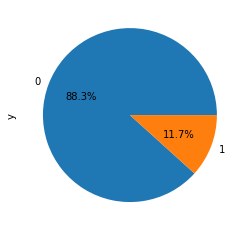

In [68]:
df.y.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [69]:
# The count plot shows that 88.3% Y variable is of 0 which denotes No and only 11.7% of Y variable is of Class 1 which denotes YES. So it is evident that the data is unbalanced and we are going to use ensemble learning methods to balance the data and only thenn can proceed.

**Balancing the data**

In [71]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [73]:
x_smote, y_smote = smote.fit_resample(X,Y)

In [74]:
bal_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'y'))
bal_df['y'] = y_smote

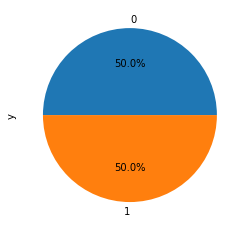

In [75]:
# Count Plot with the Balanced data
bal_df.y.value_counts().plot(kind='pie',autopct='%1.1f%%')     

In [78]:
bal_df.y.value_counts()
# This gives us the value counts in each class of the Target Y variable and proves us that they are equal in count too.

0    39916
1    39916
Name: y, dtype: int64

In [77]:
print('Shape of Unbalanced data:', df.shape)
print('Shape of Balanced data:', bal_df.shape)

Shape of Unbalanced data: (45205, 43)
Shape of Balanced data: (79832, 43)


In [83]:
# It is only with this balanced data, we are going to fit models. So we now assign it as X
x = bal_df.drop(['y','prev_outcome_unknown'], axis=1)
x.shape

(79832, 41)

Fitting different Classification models such as Logistic Regression, KNN classifier, Decision Tree Classifier, Random Forest and XG Boost.

### **Logistic Regression**

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

In [85]:
log_reg = LogisticRegression() #initialise the required package
log_reg.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
log_reg.score(X_test, Y_test)

0.8950628207396921

### **KNN classifier**

Scale the data

In [87]:
# Scaling is mandatory for KNN classification
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i)
  knn.fit(X_train,Y_train)
  print("K value: ", i, " train score: ",knn.score(X_train,Y_train), " score: ",np.mean(cross_val_score(knn, X_train, Y_train, cv=10)))
     

K value:  1  train score:  0.9999410081703684  score:  0.8694510455839639
K value:  2  train score:  0.9305666165236115  score:  0.8864406823893543
K value:  3  train score:  0.9325723387310857  score:  0.8853195818534051
K value:  4  train score:  0.917204967112055  score:  0.8905110438963455
K value:  5  train score:  0.9190337138306345  score:  0.8905404293335908
K value:  6  train score:  0.9103029230451583  score:  0.893106479149649
K value:  7  train score:  0.9130165472082117  score:  0.8931064878487129
K value:  8  train score:  0.9076777866265522  score:  0.8935195541903825
K value:  9  train score:  0.9087101436451052  score:  0.8936374178047217
K value:  10  train score:  0.9050231542931304  score:  0.8932540848628461
K value:  20  train score:  0.89835707754476  score:  0.8930770763142762
K value:  50  train score:  0.8948175677668643  score:  0.8930180879631925


The K value of 9 has the highest Cross Validation Score of 0.8936, so we take K value to be and calculate the AUROC score next.

In [90]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.8942665015041585

### **Decision Tree Classifier**

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [92]:
y_pred = dt.predict(X_test)
y_pred
# This gives us the Y pred values [ that are classified as 1 and 0 by comparing the predicted probabity with the threshold]

array([0, 0, 0, ..., 0, 0, 1])

In [93]:
roc_auc_score(Y_test, dt.predict_proba(X_test)[:, 1])

0.8584575165461755

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


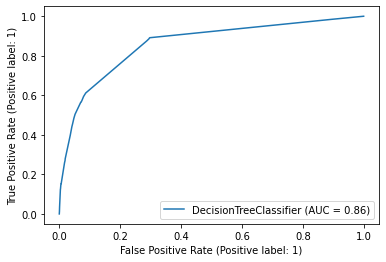

In [94]:
plot_roc_curve(dt, X_test, Y_test)

### **Random Forest**

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features ='sqrt')
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt')

In [97]:
predictions = rf.predict(X_test)
acc1 = roc_auc_score(Y_test, predictions)
print('Test auc:', acc1)

Test auc: 0.5409676276281017


In [98]:
roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1])

0.9046265785707066

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


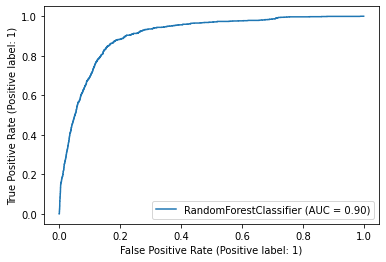

In [99]:
plot_roc_curve(rf, X_test, Y_test)

### **XG Boost**

In [101]:
import xgboost as xgb
from xgboost import XGBClassifier

In [102]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,Y_train) 
  model.score(X_test, Y_test)
  print("Learning rate:", lr, " Train score:", model.score(X_train,Y_train), " CV score :", np.mean(cross_val_score(model, X_train, Y_train, cv=10)))
     

Learning rate: 0.01  Train score: 0.900274312007787  CV score : 0.8988290625280001
Learning rate: 0.02  Train score: 0.9006282629855765  CV score : 0.8982094369183045
Learning rate: 0.03  Train score: 0.8978556469928914  CV score : 0.8975015419090443
Learning rate: 0.04  Train score: 0.8996548977966552  CV score : 0.8976196316990401
Learning rate: 0.05  Train score: 0.901424652685603  CV score : 0.8993600272802637
Learning rate: 0.06  Train score: 0.9025454974486034  CV score : 0.9003038582957317
Learning rate: 0.07  Train score: 0.9036368462967879  CV score : 0.9011002314820857
Learning rate: 0.08  Train score: 0.9051706338672094  CV score : 0.902014555273416
Learning rate: 0.09  Train score: 0.9057605521635254  CV score : 0.9026339721055822
Learning rate: 0.1  Train score: 0.9072943397339468  CV score : 0.9039612926460723
Learning rate: 0.11  Train score: 0.9077367784561838  CV score : 0.90469869487947
Learning rate: 0.12  Train score: 0.9093590537710527  CV score : 0.904787173056563

The Learning rate of has the highest Cross validation score of 0.90602594, so we take CV to be 0.5 and calculate the AUROC value next

In [105]:
model = xgb.XGBClassifier(learning_rate = 0.5, n_estimators=100)
model.fit(X_train,Y_train)
model.score(X_test, Y_test)

0.9032914528402053

### **Feature Importance**

In [106]:
from sklearn.feature_selection import RFE

In [108]:
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, Y_train)
list(zip(['age', 'day', 'dur', 'num_calls', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_qual_primary', 'education_qual_secondary',
       'education_qual_tertiary', 'education_qual_unknown',
       'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],selector.support_))

[('age', True),
 ('day', True),
 ('dur', True),
 ('num_calls', False),
 ('y', False),
 ('job_admin.', False),
 ('job_blue-collar', False),
 ('job_entrepreneur', False),
 ('job_housemaid', False),
 ('job_management', False),
 ('job_retired', False),
 ('job_self-employed', False),
 ('job_services', False),
 ('job_student', False),
 ('job_technician', False),
 ('job_unemployed', False),
 ('job_unknown', False),
 ('marital_divorced', False),
 ('marital_married', False),
 ('marital_single', False),
 ('education_qual_primary', False),
 ('education_qual_secondary', False),
 ('education_qual_tertiary', False),
 ('education_qual_unknown', False),
 ('call_type_cellular', False),
 ('call_type_telephone', False),
 ('call_type_unknown', False),
 ('mon_apr', False),
 ('mon_aug', False),
 ('mon_dec', False),
 ('mon_feb', False),
 ('mon_jan', False),
 ('mon_jul', False),
 ('mon_jun', False),
 ('mon_mar', False),
 ('mon_may', False),
 ('mon_nov', False),
 ('mon_oct', False),
 ('mon_sep', False),
 ('pre

=> We have set the number of important features to be selected as 3 here. 

=> Thus features: Age, Day and Duration  are inferred to be the 3 most important features.

**Comparing among AUROC scores of the above models**

After fitting different classification models and finding their AUROC scores, It is essential to pick the best as the one with the highest AUROC score.



1.   Logistic Regression Model - 0.89
2.   K Nearest Neighbours Model - 0.89
3.   Decision Tree Model - 0.85
4.   Random Forest Model - 0.904
5.   XG Boost Model - 0.903






From the evaluation metric: AUROC we observe that Decision Tree has the least AUROC and Random forest has the highest AUROC score of 0.904.

**Thus we infer that the best model to find the Customer Converson Prediction is the Random Forest Model with the highest AUROC score of 0.904**

# Deployment of the Model